 # Test and Evaluation

One of the most important part of machine learning analytics is to take a deeper dive into model evaluation and performance metrics, and potential prediction-related errors that one may encounter. In this section, we did the error analysis for all the models we used for bot detection and compared the results. 

Note that in this classification problem, we define bots as positive, human users as negative. 

## Error analysis

We calculated the confusion matrix for all the models and the result is shown in the table below. Based on those results, we did error analysis by comparing test accuracy, F score and AUC.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Test accuracy

We calculated the training accuracy and test accuracy for 11 models we created and also timed the training process for each model. The results are shown in the dataframe below, sorted by training time.

In terms of training time, most of the models can be trained in a reasonable time, although polynomial logistic regression, stacking model and neural network seem to take extra long time . 

For the training accuracy, all the models have a very high training accuracy, some of them even reach 1.0.

In [5]:
df_timing = pd.read_csv('df_timing_acc.csv')
df_time = df_timing.sort_values(['training time(s)'], ascending = False)
df_timing = df_time.rename(index=str, columns={"Unnamed: 0": "Model"})
df_timing

,Model,training time(s),train accuracy,test accuracy
8,Stacking (2nd-Level Model),399.203999,0.993096,0.986386
1,Polynomial LR,50.692994,0.998938,0.969059
10,ANN,38.072873,0.994158,0.977723
4,AdaBoost,22.391462,1.000000,0.971535
6,kNN,15.479240,0.968136,0.949257
9,Blending (3rd-Level Model),4.316027,1.000000,0.985149
5,XGBoost,2.791808,0.982673,0.982673
7,SVM,0.493397,0.925119,0.913366
0,Linear LR,0.278980,0.989379,0.971535
3,Random Forest,0.201104,1.000000,0.983911


Below we plotted the test accuracy, where the dashed line represents 98% accuracy. We can see that random forest, stacking and blending model appeared to be the best in terms of test accuracy. Given the similar accuracy, random forest model takes much shorter time to train, while the stacking training process is extremely time-consuming.

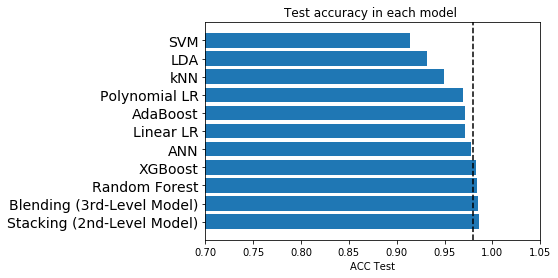

In [67]:
fig = plt.figure()
xx = np.arange(len(df_timing))
index_name=df_timing['Model']
plt.barh(xx, df_timing['test accuracy'])
plt.title('Test accuracy in each model ')
plt.xlabel('ACC Test')
plt.xlim((0.7,1.05))
plt.ylim((-1,11))
plt.vlines(0.98, -1, 11, linestyle = 'dashed')
plt.yticks(xx,index_name,fontsize = 14);

### 2. F score

The traditional F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall, where precision is positive predictive value and recall is true positive rate. F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [95]:
test_pred_df = pd.read_csv('test_pred_df_for_ROC.csv')
from sklearn.metrics import f1_score
model_lst = df_timing['Model'].values
fscore_lst = []
for model in model_lst:
    fscore_lst.append(f1_score(test_pred_df['Actual'], test_pred_df[model]))

fscore_df = pd.DataFrame()
fscore_df['Model'] = model_lst
fscore_df['F score'] = fscore_lst
fscore_df = fscore_df.sort_values('F score', ascending = False)
fscore_df

,Model,F score
0,Stacking (2nd-Level Model),0.987709
1,Blending (3rd-Level Model),0.986667
2,Random Forest,0.985442
3,XGBoost,0.984410
4,ANN,0.980000
5,Linear LR,0.974642
6,AdaBoost,0.974070
7,Polynomial LR,0.972497
8,kNN,0.955580
9,LDA,0.940541


From the F score values, we can see that the three best models are stacking, blending and random forest.

### 3. AUC

We also plotted the ROC(Receiver Operating Characteristic) curve and calculated AUC(Area under ROC curve) of different models to compare. An ROC curve is a two-dimensional plot of sensitivity (true positive rate) vs specificity (false positive rate). The area under the curve is referred to as the AUC, and is a numeric metric used to represent the quality and performance of the classifier (model). An AUC of 0.5 is essentially the same as random guessing without a model, whereas an AUC of 1.0 is considered a perfect classifier. Generally, the higher the AUC value, the better. 

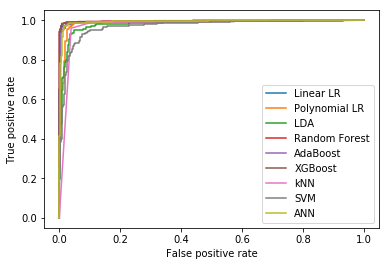

,Model,AUC
5,XGBoost,0.997405
3,Random Forest,0.996267
8,ANN,0.993682
0,Linear LR,0.993483
4,AdaBoost,0.991806
1,Polynomial LR,0.986012
2,LDA,0.979365
6,kNN,0.973546
7,SVM,0.969835


In [114]:
test_pred_df = pd.read_csv('test_pred_df_for_ROC.csv')

from sklearn import metrics
fpr_LLR, tpr_LLR, thresholds_LLR = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['Linear LR_prob'])
auc_LLR = metrics.auc(fpr_LLR, tpr_LLR)

fpr_PLR, tpr_PLR, thresholds_PLR = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['Polynomial LR_proba'])
auc_PLR = metrics.auc(fpr_PLR, tpr_PLR)

fpr_LDA, tpr_LDA, thresholds_LDA = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['LDA_proba'])
auc_LDA = metrics.auc(fpr_LDA, tpr_LDA)

fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['Random Forest_proba'])
auc_RF = metrics.auc(fpr_RF, tpr_RF)
    
fpr_AdaBoost, tpr_AdaBoost, thresholds_AdaBoost = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['AdaBoost_proba'])
auc_AdaBoost = metrics.auc(fpr_AdaBoost, tpr_AdaBoost)

fpr_XGBoost, tpr_XGBoost, thresholds_XGBoost = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['XGBoost_proba'])
auc_XGBoost = metrics.auc(fpr_XGBoost, tpr_XGBoost)

fpr_kNN, tpr_kNN, thresholds_kNN = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['kNN_proba'])
auc_kNN = metrics.auc(fpr_kNN, tpr_kNN)

fpr_SVM, tpr_SVM, thresholds_SVM = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['SVM_proba'])
auc_SVM = metrics.auc(fpr_SVM, tpr_SVM)

#fpr_Stacking, tpr_Stacking, thresholds_Stacking = metrics.roc_curve(test_pred_df['Stacking (2nd-Level Model)'], test_pred_df['Stacking_proba'])
#auc_Stacking = metrics.auc(fpr_Stacking, tpr_Stacking)

#fpr_Blending, tpr_Blending, thresholds_Blending = metrics.roc_curve(test_pred_df['Blending'], test_pred_df['Blending_proba'])
#auc_Blending = metrics.auc(fpr_Blending, tpr_Blending)

fpr_ANN, tpr_ANN, thresholds_ANN = metrics.roc_curve(test_pred_df['Actual'], test_pred_df['ANN_proba'])
auc_ANN = metrics.auc(fpr_ANN, tpr_ANN)

plt.plot(fpr_LLR, tpr_LLR, label = 'Linear LR')
plt.plot(fpr_PLR, tpr_PLR, label = 'Polynomial LR')
plt.plot(fpr_LDA, tpr_LDA, label = 'LDA')
plt.plot(fpr_RF, tpr_RF, label = 'Random Forest')
plt.plot(fpr_AdaBoost, tpr_AdaBoost, label = 'AdaBoost')
plt.plot(fpr_XGBoost, tpr_XGBoost, label = 'XGBoost')
plt.plot(fpr_kNN, tpr_kNN, label = 'kNN')
plt.plot(fpr_SVM, tpr_SVM, label = 'SVM')
plt.plot(fpr_ANN, tpr_ANN, label = 'ANN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

models_list = ['Linear LR', 'Polynomial LR', 'LDA', 'Random Forest', 'AdaBoost', 'XGBoost', 'kNN', 'SVM', 'ANN']
auc_lst = [auc_LLR, auc_PLR, auc_LDA, auc_RF, auc_AdaBoost, auc_XGBoost, auc_kNN, auc_SVM, auc_ANN]

auc_df = pd.DataFrame()
auc_df['Model'] = models_list
auc_df['AUC'] =auc_lst
auc_df = auc_df.sort_values('AUC', ascending = False)
auc_df

The table above showing AUC is ranked in descending order. From the ROC curve, except for some poorly performing models like SVM, kNN, LDA and Polynomial LR, those ROC curves for models with AUC higher than 0.99 overlapped with each other and are not distinguishable. The higher AUC, the better. In terms of AUC, XGBoost, random forest and ANN are the best. Note that we didn't include stacking and blending into this comparison, because we weren't able to calculate the prediction probability from those models.

## Evaluation

After training the model and getting a fairly good result on the test set, we tried to use the model to predict bots on the unknown data and compared our results with a well-developed twitter bot detection platform, Botometer. 

Botometer (formerly BotOrNot), developed by researchers in Indiana University, checks the activity of a Twitter account and gives it a score based on how likely the account is to be a bot[1]. Higher scores are more bot-like. Botometer extracted 1150 features as the input of the model, including user meta-data, friend, network, timing, content and sentiment. It was trained on Social Honeypot dataset as we did as well. So we decided to compare our models with Botometer and see how well they do.

The data was extracted from API search by using the keyword "Trump". We extracted 898 users and constructed the features for the model. 

### 1. Extracting the data

In [ ]:
import time
def get_tweets(query, count):

    # empty list to store parsed tweets
    tweets = []
    # call twitter api to fetch tweets
    q=str(query)
    
    for i in range(12):
        fetched_tweets = api.search(q, count = count)
        # parsing tweets one by one
    
        for tweet in fetched_tweets:

            # empty dictionary to store required params of a tweet
            parsed_tweet = {}
            tweets.append(tweet.user.id)
        
        # Set sleep time to make sure that we got some different users
        time.sleep(10)

    return tweets

tweets = get_tweets(query ="Trump", count = 100)
user_id_lst = list(set(tweets))
id_str_lst = [str(s) for s in user_id_lst]

# Please see Data Acquisition for API_scrap and create_df function definition
dfs_pred, fail_lst_pred = API_scrap(id_str_lst[0:1000], 10)
full_df_pred = create_df(dfs_pred, 'pred_dataframe')

### 2. Bots detection through Botometer

To check bots through Botometer, one needs to install Botometer by: pip install botometer. The API they used is served via Mashape Market. You must sign up for a free account in order to obtain a Mashape secret key to run Botometer. After setting up the base environment, Botometer can loop through the provided user_id list and return bot detection results.

In [ ]:
import botometer

mashape_key = "uIX3UUkrh7mshux9VLXhN1FcUYY0p1ZEJpCjsnCHKddXFfIzhf"
twitter_app_auth = {
    'consumer_key': 'pr0AH7Ot5sZmig4u3bA6j51ty',
    'consumer_secret': 'tNteF0tRlEjKJfkkWQaIv5myqT9oBqrIVOYPQJOMjBTJhn9SAF',
    'access_token': '934846563825930241-yO5rosUB4x8eFMO0J7IXV1UZM0RzbgL',
    'access_token_secret': 'CbqfvlRonXo2JiIyxqCqeZynwkslNcDPmGFQ9KBEh8Mch',
  }

bom = botometer.Botometer(wait_on_ratelimit=True,mashape_key=mashape_key,twitter_app_auth)

bot_df_final = pd.read_csv('bot_df_final.csv')
pred_lst = bot_df_final['User ID'][0:100]
total_result_lst = []
for user_id in pred_lst:
    result = bom.check_account(user_id)
    total_result_lst.append(result)

The returned result from Botometer is a dictionary of all kinds of scores that could be used to detect bots. We extracted all the information and put it in a more user-friendly data structure. We interpreted the result from Botometer by setting the threshold for bot score as 0.5, which is similar to their result in the paper[1], meaning that any user has a bot score higher than 0.5 would be identified as a bot.

In [11]:
df_botometer = pd.read_csv('botometer_result.csv')
df_botometer.head()

,User_id,User_name,cap_english,cap_universal,cat_content,cat_friend,cat_network,cat_sentiment,cat_temporal,cat_user,ds_content,ds_friend,ds_network,ds_sentiment,ds_temporal,ds_user,score_eng,score_uni
0,876476261220179968,CKassube,0.009922,0.012907,0.381523,0.209572,0.224270,0.655212,0.229194,0.175910,1.9,1.0,1.1,3.3,1.1,0.9,0.180767,0.194668
1,909863671563739136,lesabaker43,0.032183,0.060559,0.333488,0.452812,0.627139,0.698843,0.355949,0.110530,1.7,2.3,3.1,3.5,1.8,0.6,0.322306,0.413570
2,951973545831223296,justinChilds17,0.075832,0.104603,0.767062,0.552900,0.568829,0.624537,0.399625,0.700922,3.8,2.8,2.8,3.1,2.0,3.5,0.463592,0.515643
3,981943174947065856,onegracehill,0.018904,0.011448,0.288679,0.356398,0.403511,0.072140,0.301336,0.126666,1.4,1.8,2.0,0.4,1.5,0.6,0.252653,0.182079
4,4735793156,BrennyBatt,0.001828,0.005213,0.085698,0.178233,0.194174,0.059859,0.083889,0.054257,0.4,0.9,1.0,0.3,0.4,0.3,0.049184,0.111167


In [7]:
dff_botometer = df_botometer.loc[(df_botometer['score_eng'] > 0.5)&(df_botometer['score_uni'] > 0.5)]
print('Percentage of bots detected by Botometer:',len(dff_botometer)/len(df_botometer))
botometer = dff_botometer['User_id'].values

Percentage of bots detected by Botometer: 0.08351893095768374


### 3. Bots detection through our model

#### With user features only

Below is the comparison result of models using only user meta data features with Botometer. The percentages of bots detected through three models are around the same level, although the detected bots are not exactly the same. 

In Venn diagram below, we show the intersection between different groups of bots detected by different models. To further compare the models performance, we did some manual check on those bots sitting in different groups and found that:

1. The intersection of three models are definitely bots, either with crazily high tweeting frequency or full of retweets.
2. For those "bots" detected by only one model, some of them can also be verified as bots, but others are more like active human users.

Detailed manual check results can be found below.

In [44]:
user_models_df = pd.read_csv('bot_detection_df2.csv')
print('*****************User features only*****************')
print('Percentage of bots detected by Botometer:',len(dff_botometer)/len(df_botometer))
user_bot_rf = list(user_models_df.loc[user_models_df['Random Forest'] == 1]['User ID'].values)
print('Percentage of bots detected by random forest:',len(user_bot_rf)/len(user_models_df))
user_bot_stacking = list(user_models_df.loc[user_models_df['stacking'] == 1]['User ID'].values)
print('Percentage of bots detected by stacking:',len(user_bot_stacking)/len(user_models_df))

print('Random forest:', list(set(user_bot_rf).intersection(botometer)))
print('Stacking:', list(set(user_bot_stacking).intersection(botometer)))

*****************User features only*****************
Percentage of bots detected by Botometer: 0.08351893095768374
Percentage of bots detected by random forest: 0.04788418708240535
Percentage of bots detected by stacking: 0.07906458797327394
Random forest: [1060298184277323776, 801555575687495681, 918534858871377920, 1065496286101757952, 892394563243061250, 52985157, 1017816501951184898, 3792585192, 108985609, 766547376, 36175156, 4180352153]
Stacking: [726236936038440960, 1020642357539196928, 801555575687495681, 4918885219, 1060298184277323776, 1028366243601018881, 952224908351860738, 1067507183829622789, 3792585192, 108985609, 52985157, 834852928376733697, 994233749020659712, 1017816501951184898, 766547376, 36175156, 3648811994]


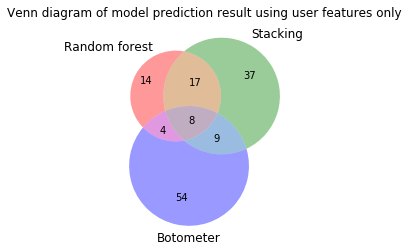

In [47]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
set1 = set(user_bot_rf)
set2 = set(user_bot_stacking)
set3 = set(botometer)

venn3([set1, set2, set3], ('Random forest', 'Stacking', 'Botometer'))
plt.title('Venn diagram of model prediction result using user features only')
plt.show()

Below is the detailed result from manual check.

Intersection of the three:
   1. 1060298184277323776, Cal Washington, original tweets about random stuff, about 10 tweets per hour and tweets continuously through the day.
   2. 766547376, Ron *Thug* Hall, political bot (Obama supporter), most of the posts are retweets.
   3. 36175156, Jo4Trump {⭐️} (K) ⭐️⭐️⭐️, political bot(Trump supporter), most of the posts are retweets.
   4. 801555575687495681, ▶ Trump Daily News 📰, original tweets with high frequency.
   5. 52985157, ❌Janice nagao, political/religious bot, most of the posts are retweets.
   6. 108985609, Off Grid Capital, business/political bot, most of the posts are retweets.
   7. 3792585192, Countable Action, all original tweets with media in almost every tweet.
   8. 1017816501951184898, xiangfei000, original tweets with high frequency, mostly political news, tweet continuously through the day with a high frequency.
    
Detected only by random forest
   1. 2136431, Sandrine Plasseraud, CEO of We are social France, has a lot of retweets, but also have fair amount of interation with other users
   2. 1037558870, Sophie Rose, looks like a human user
   3. 794727833041969152, lonie koob, political bot, full of retweets against Trump.
    
Detected only by stacking
   1. 7577032, Jeremy Ricketts, looks like a human user
   2. 1447517750, Reject Trump Nazism 🔥🐈, political bot, full of retweets
   3. 923159798840832001, Michael T Biehunko, political bot, full of retweets
    
Detected only by Botometer
   1. 16585101, ouchinagirl, political bot, seems to be part of a botnet, only retweets
   2. 4784160126, Disco_Snoopy, bot, tweets every minute.
   3. 981849056380116992, lasandr61994924, very young twitter account, might be a bot, only retweets, default settings.



#### Combine NLP features and user features

Below is the comparison result of models using user features and NLP generated features with Botometer. The percentages of bots detected by our model are much lower than that of Botometer. 

In Venn diagram below, we show the intersection between different groups of bots detected by different models. To further compare the models performance, we did some manual check on those bots sitting in different groups and found that:

1. The intersection of three models is actually not a typical bot.
2. For those "bots" detected by only one model, same as before, some of them can also be verified as bots, but others are more like active human users.

Detailed manual check results can be found below.

In [46]:
models_df = pd.read_csv('pre_df_prediction_NLP_final.csv')

random_forest03 = []
for i in range(len(models_df)):
    if models_df['Random Forest_proba'][i] >= 0.3:
        random_forest03.append(1)
    else: random_forest03.append(0)

models_df['Random Forest03'] = random_forest03
print('*****************User features & NLP features*****************')
print('Percentage of bots detected by Botometer:',len(dff_botometer)/len(df_botometer))
#bot_rf = list(models_df.loc[models_df['Random Forest'] == 1]['User ID'].values)
bot_rf = list(models_df.loc[models_df['Random Forest03'] == 1]['User ID'].values)
print('Percentage of bots detected by random forest:',len(bot_rf)/len(models_df))
bot_stacking = list(models_df.loc[models_df['Stacking (2nd-Level Model)'] == 1]['User ID'].values)
print('Percentage of bots detected by stacking:',len(bot_stacking)/len(models_df))

print('Random forest:', list(set(bot_rf).intersection(botometer)))
print('Stacking:', list(set(bot_stacking).intersection(botometer)))

*****************User features & NLP features*****************
Percentage of bots detected by Botometer: 0.08351893095768374
Percentage of bots detected by random forest: 0.05753739930955121
Percentage of bots detected by stacking: 0.00805523590333717
Random forest: [981849056380116992, 1005429994682834944, 898297278074687488, 817807265633705984, 871379599472697344, 836057575296663552, 1070725412190224384, 892394563243061250, 945886293359198209, 108985609, 491838942]
Stacking: [981849056380116992]


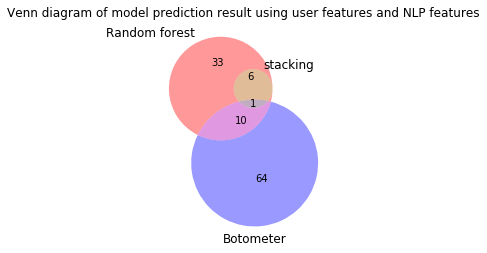

In [48]:
set1 = set(bot_rf)
set2 = set(bot_stacking)
set3 = set(botometer)

venn3([set1, set2, set3], ('Random forest', 'stacking', 'Botometer'))
plt.title('Venn diagram of model prediction result using user features and NLP features')
plt.show()

Below is the detailed result from manual check.

Intersection of the three:
   1. 981849056380116992, lasandr61994924, very young twitter account, might be a bot, only retweets, default settings.
    
Detected only by random forest
   1. 47872600, Gerlandinho, frequent retweets only, looks like a bot
   2. 766167322109284352, SavingTheWest, default settings, a lot of retweets, but the frequency is acceptable, also some original tweets.
   3. 1028343989005692929, sandyburrell8, looks like a bot, default settings, frequently continuous tweets and retweets.
    
Detected only by Botometer
   1. 16585101, ouchinagirl, political bot, seems to be part of a botnet, only retweets
   2. 4784160126, Disco_Snoopy, definitely a bot, tweets every minute.
   3. 978333132511436800, RobertElzey6, looks like a bot, very frequent retweets.




### 4. Conclusion

From the comparison above, none of the models can capture all the bots. Even for the complex model using more than 1000 features like Botometer, there is still some missing spots. But our random forest model and stacking model with user features seem to do a decent job at bot detection. Adding NLP related features did improve the training and test accuracy a lot, but there might be some overfitting problem, so the model predicts limited bots when applied to real world.

## Reference

[1] Varol, O., Ferrara, E., Davis, C. A., Menczer, F., & Flammini, A. (2017). Online human-bot interactions: Detection, estimation, and characterization. arXiv preprint arXiv:1703.03107.